In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
car=pd.read_csv("CarsData.csv")
car.head(10)

model  year  price transmission  mileage fuelType  tax   mpg  \
0            I10  2017   7495       Manual    11630   Petrol  145  60.1   
1           Polo  2017  10989       Manual     9200   Petrol  145  58.9   
2       2 Series  2019  27990    Semi-Auto     1614   Diesel  145  49.6   
3   Yeti Outdoor  2017  12495       Manual    30960   Diesel  150  62.8   
4         Fiesta  2017   7999       Manual    19353   Petrol  125  54.3   
5           C-HR  2019  26791    Automatic     2373   Hybrid  135  74.3   
6           Kuga  2019  17990       Manual     7038   Petrol  145  34.4   
7         Tiguan  2019  27490    Semi-Auto     3000   Petrol  145  30.4   
8         Fiesta  2018   9891       Manual    31639   Petrol  145  65.7   
9        A Class  2017  17498       Manual     9663   Diesel   30  62.8   

   engineSize Manufacturer  
0         1.0       hyundi  
1         1.0   volkswagen  
2         2.0          BMW  
3         2.0        skoda  
4         1.2         ford  
5         1.8       toyota  
6         1.5         ford  
7         2.0   volkswagen  
8         1.0         ford  
9         2.1         merc

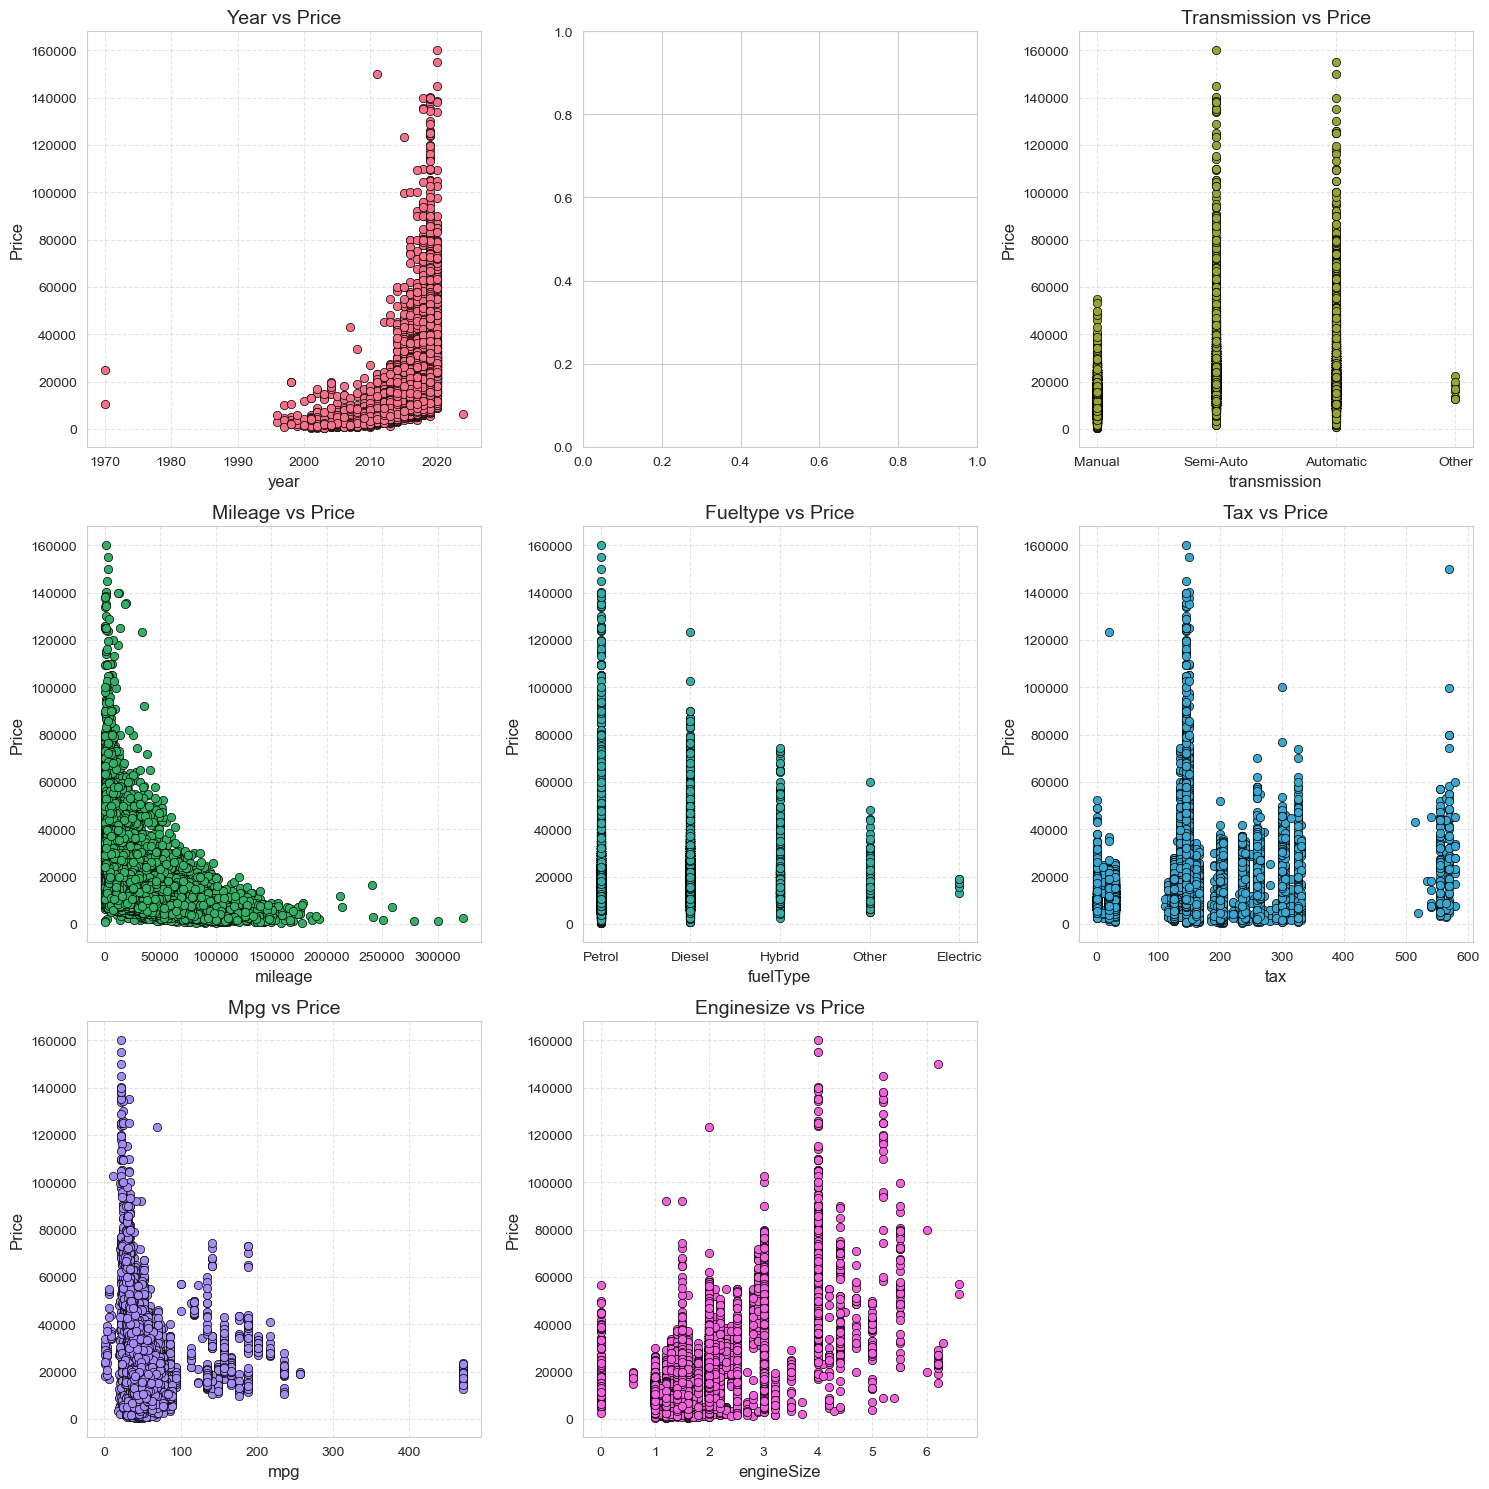

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set_style("whitegrid")

# Define a color palette
palette = sns.color_palette("husl", len(car.columns[1:-1]))

# Calculate the number of rows and columns for subplots
num_cols = 3
num_rows = (len(car.columns[1:-1]) - 1) // num_cols + 1

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

# Flatten the axes array to iterate over it easily
axes = axes.flatten()

# Iterate over each column (except the first and last)
for i, label in enumerate(car.columns[1:-1]):
    # Skip 'price' vs 'price'
    if label == 'price' :
        continue

    # Create scatter plot with custom marker and color
    sns.scatterplot(x=label, y='price', data=car, ax=axes[i], color=palette[i], edgecolor='k', linewidth=0.5)

    # Add labels and title
    axes[i].set_xlabel(label, fontsize=12)
    axes[i].set_ylabel('Price', fontsize=12)
    axes[i].set_title(f'{label.capitalize()} vs Price', fontsize=14)

    # Add grid lines
    axes[i].grid(True, linestyle='--', alpha=0.5)

# Remove any unused subplots
for j in range(len(car.columns[1:-1]), num_rows * num_cols):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


**DISTTRIBUTION OF FUEL TYPES**

In [6]:
import plotly.express as px

# Get fuel type counts
fuel_type_counts = car["fuelType"].value_counts().reset_index()

# Create the pie chart
fig = px.pie(fuel_type_counts,
             values='count',
             names='fuelType',
             title='Distribution of Fuel Types',
             color_discrete_sequence=px.colors.qualitative.Set3,  # Set color palette
             hole=0.3,  # Set the size of the inner hole
             labels={'fuelType':'Fuel Type', 'count':'Count'},  # Set custom labels
             )

# Update layout
fig.update_traces(textposition='inside', textinfo='percent+label')  # Show percentage and label inside slices
fig.update_layout(font=dict(family="Arial", size=14), legend=dict(title='', orientation='h', yanchor='bottom', y=1.02, xanchor='right', x=1))  # Adjust font and legend position
fig.update_layout(margin=dict(t=80, b=0, l=0, r=0))  # Adjust margins

# Show the plot
fig.show()


**DISTRIBUTION OF TRANSMISSION TYPES**

In [7]:
import plotly.express as px

# Get transmission type counts
transmission_type_counts = car["transmission"].value_counts().reset_index()

# Rename columns to match the expected format by Plotly Express
transmission_type_counts.columns = ["transmission", "count"]

# Create the pie chart
fig = px.pie(transmission_type_counts,
             values='count',
             names='transmission',
             title='Distribution of Transmission Types',
             color_discrete_sequence=px.colors.qualitative.Set3)  # Set color palette

# Update layout and style
fig.update_traces(textposition='inside', textinfo='percent+label')  # Show percentage and label inside slices
fig.update_layout(font=dict(family="Arial", size=14), legend=dict(title='', orientation='h', yanchor='bottom', y=1.02, xanchor='right', x=1))  # Adjust font and legend position
fig.update_layout(margin=dict(t=80, b=0, l=0, r=0))  # Adjust margins

# Show the plot
fig.show()


**AVERAGE PRICE FOR EACH MANUFACTURER**

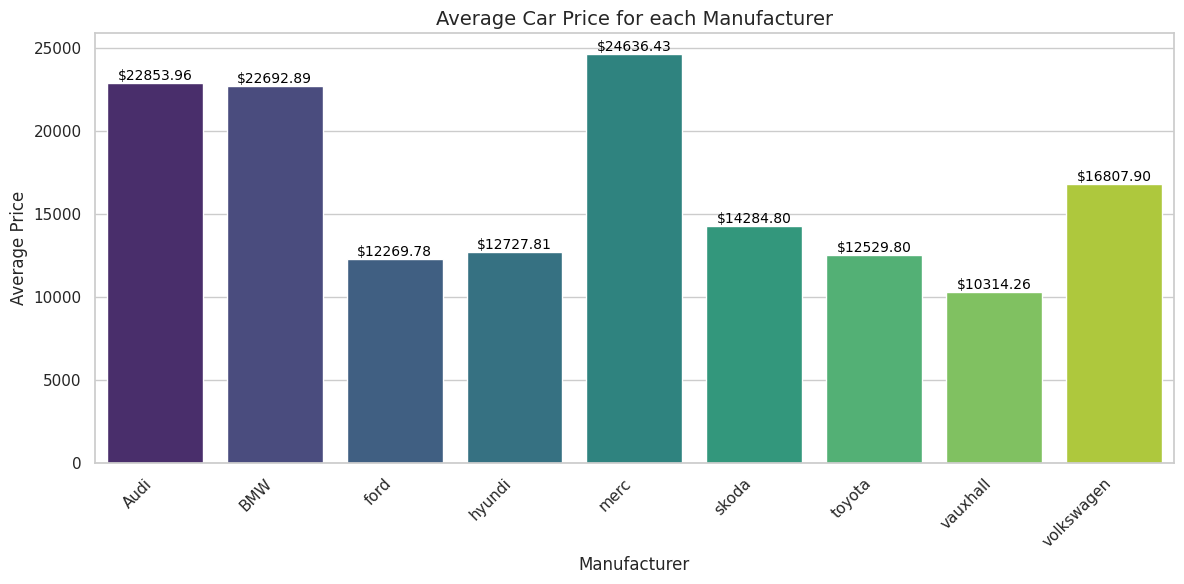

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group by Manufacturer and calculate the mean price
total_prices_per_year = car.groupby('Manufacturer')['price'].mean().reset_index()

# Set plot style
sns.set_style("whitegrid")

# Create the figure and axes objects
plt.figure(figsize=(12, 6))

# Create the bar plot
ax = sns.barplot(x='Manufacturer', y='price', data=total_prices_per_year, palette='viridis')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Set axis labels and title
plt.xlabel('Manufacturer', fontsize=12)
plt.ylabel('Average Price', fontsize=12)
plt.title('Average Car Price for each Manufacturer', fontsize=14)

# Add data labels to each bar
for p in ax.patches:
    ax.annotate(f"${p.get_height():.2f}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# Show plot
plt.tight_layout()
plt.show()


**GRAPH BETWEEN ALL ATTRIBUTES**

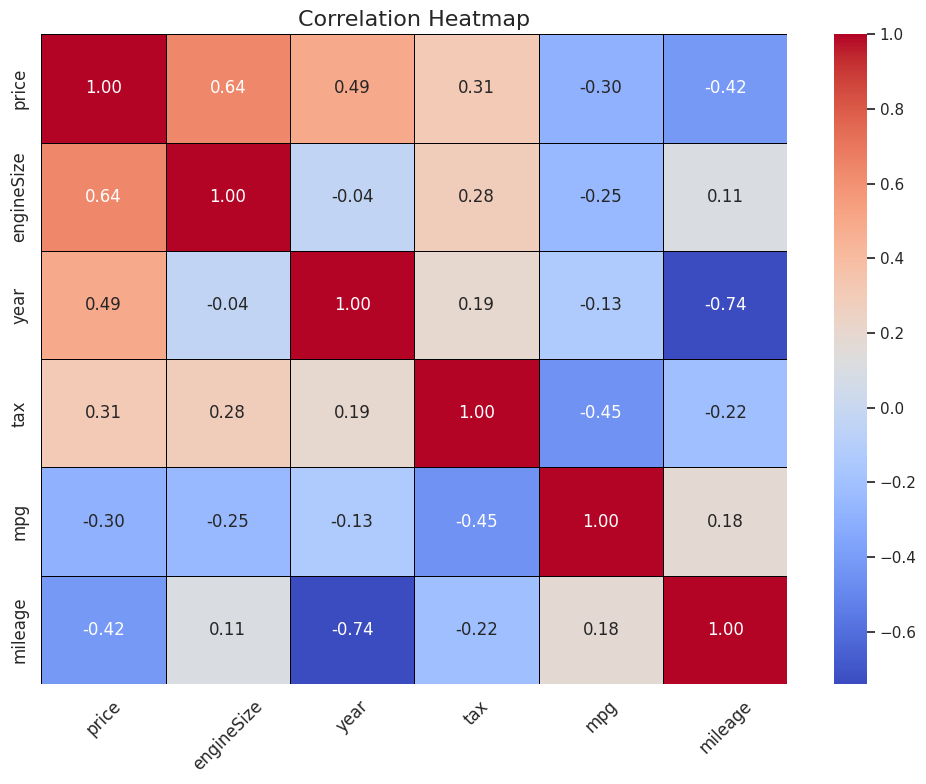

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

attributes = ["price", "engineSize", "year", "tax", "mpg", "mileage"]
corr = car[attributes].corr()

# Set seaborn style
sns.set_style("whitegrid")

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, linecolor='black')

# Set title and adjust font size
plt.title('Correlation Heatmap', fontsize=16)

# Rotate x-axis tick labels for better readability
plt.xticks(rotation=45)

# Adjust font size for tick labels
plt.tick_params(axis='both', which='major', labelsize=12)

# Show plot
plt.tight_layout()
plt.show()



**MILAGE VS TRANSMISSION**

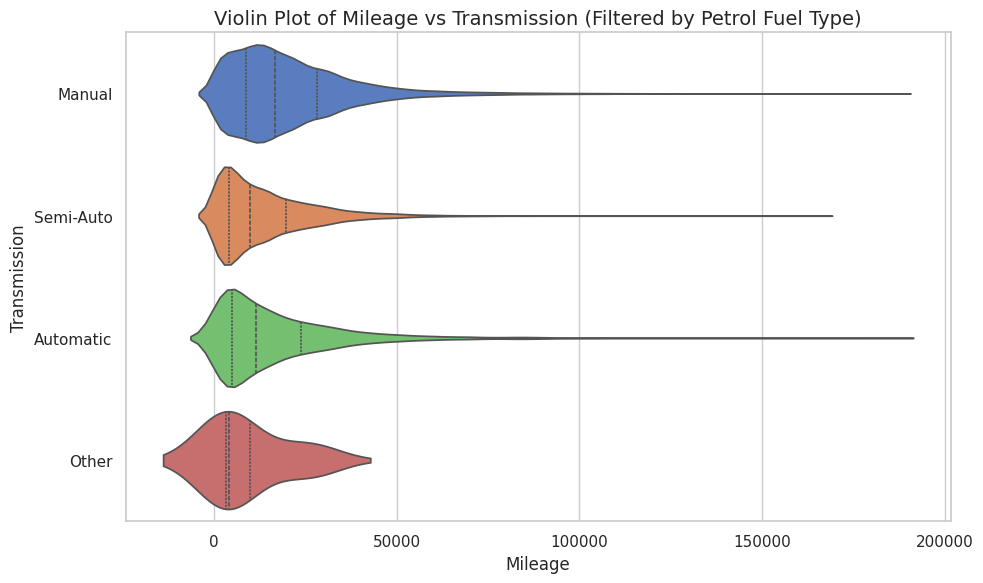

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the data for "Petrol" fuel type
petrol_data = car[car["fuelType"] == "Petrol"]

# Set seaborn style
sns.set(style="whitegrid")

# Create the violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x="mileage", y="transmission", data=petrol_data, palette="muted", inner='quartile')

# Set labels and title
plt.xlabel("Mileage", fontsize=12)
plt.ylabel("Transmission", fontsize=12)
plt.title("Violin Plot of Mileage vs Transmission (Filtered by Petrol Fuel Type)", fontsize=14)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


**MILAGE VS ENGINE SIZE**

<Figure size 1000x600 with 0 Axes>

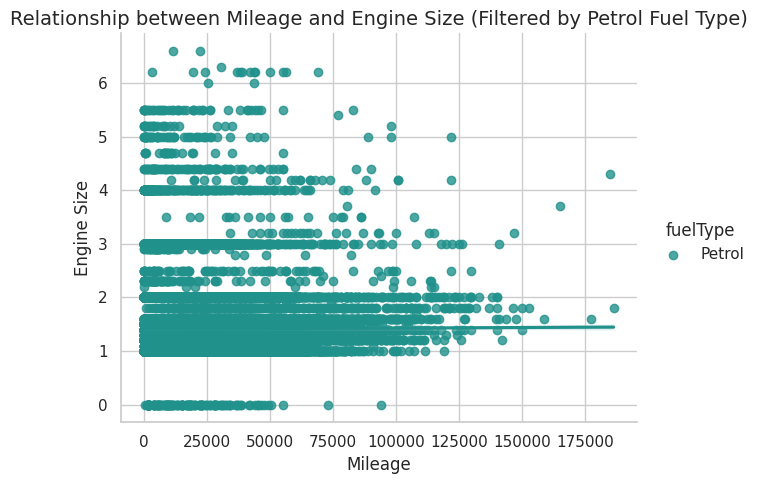

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the data for "Petrol" fuel type
petrol_data = car[car["fuelType"] == "Petrol"]

# Set seaborn style
sns.set(style="whitegrid")

# Create the lmplot
plt.figure(figsize=(10, 6))
sns.lmplot(x="mileage", y="engineSize", data=petrol_data, hue="fuelType", palette="viridis")

# Set labels and title
plt.xlabel("Mileage", fontsize=12)
plt.ylabel("Engine Size", fontsize=12)
plt.title("Relationship between Mileage and Engine Size (Filtered by Petrol Fuel Type)", fontsize=14)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


**ANNUAL SUM OF PRICES**

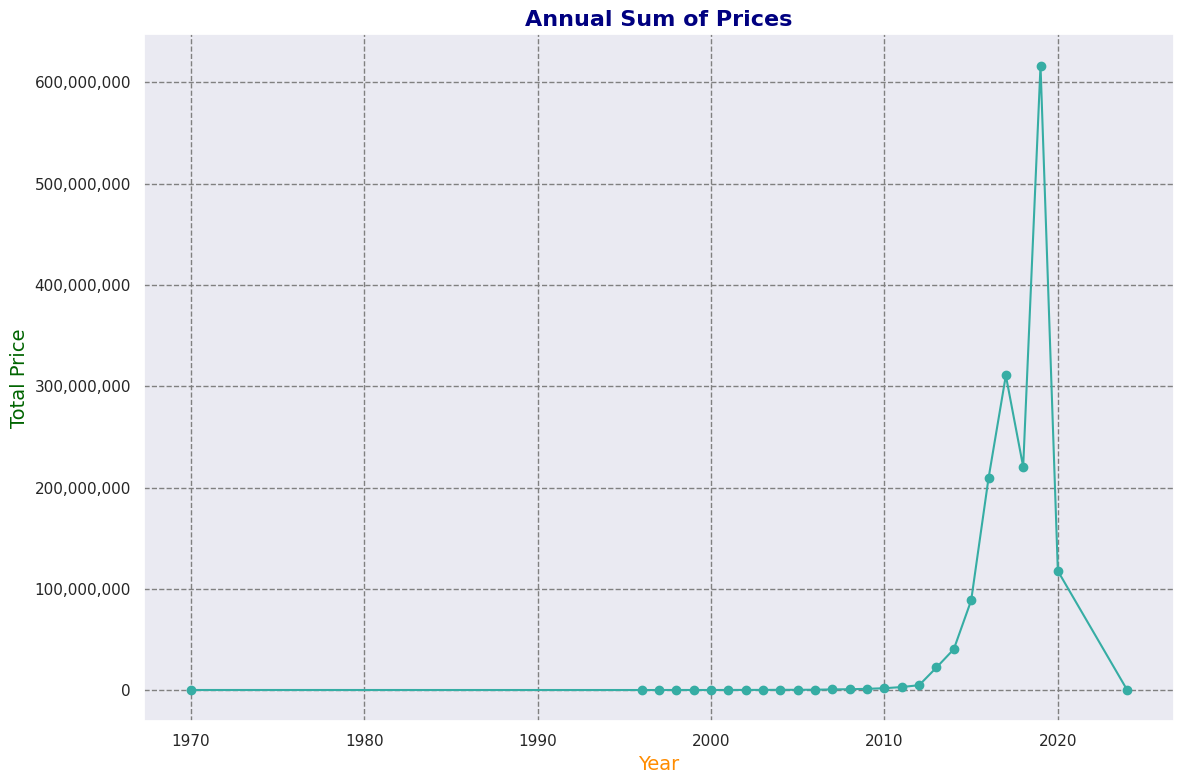

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set seaborn style to "darkgrid" for a funky look
sns.set(style="darkgrid")

# Create the line plot
plt.figure(figsize=(12, 8))
ax = car.groupby('year')['price'].sum().plot(kind='line', color=sns.color_palette('husl')[3], marker='o')

# Format y-axis labels with commas
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

# Set title and labels
plt.title('Annual Sum of Prices', fontsize=16, color='navy', fontweight='bold')
plt.xlabel('Year', fontsize=14, color='darkorange')
plt.ylabel('Total Price', fontsize=14, color='darkgreen')

# Adjust layout
plt.tight_layout()

# Add gridlines with dashed lines
plt.grid(True, linestyle='--', linewidth=1, color='gray')

# Show plot
plt.show()


**TOTAL PRICE BY FUEL TYPE AND YEAR**

<Figure size 1500x1000 with 0 Axes>

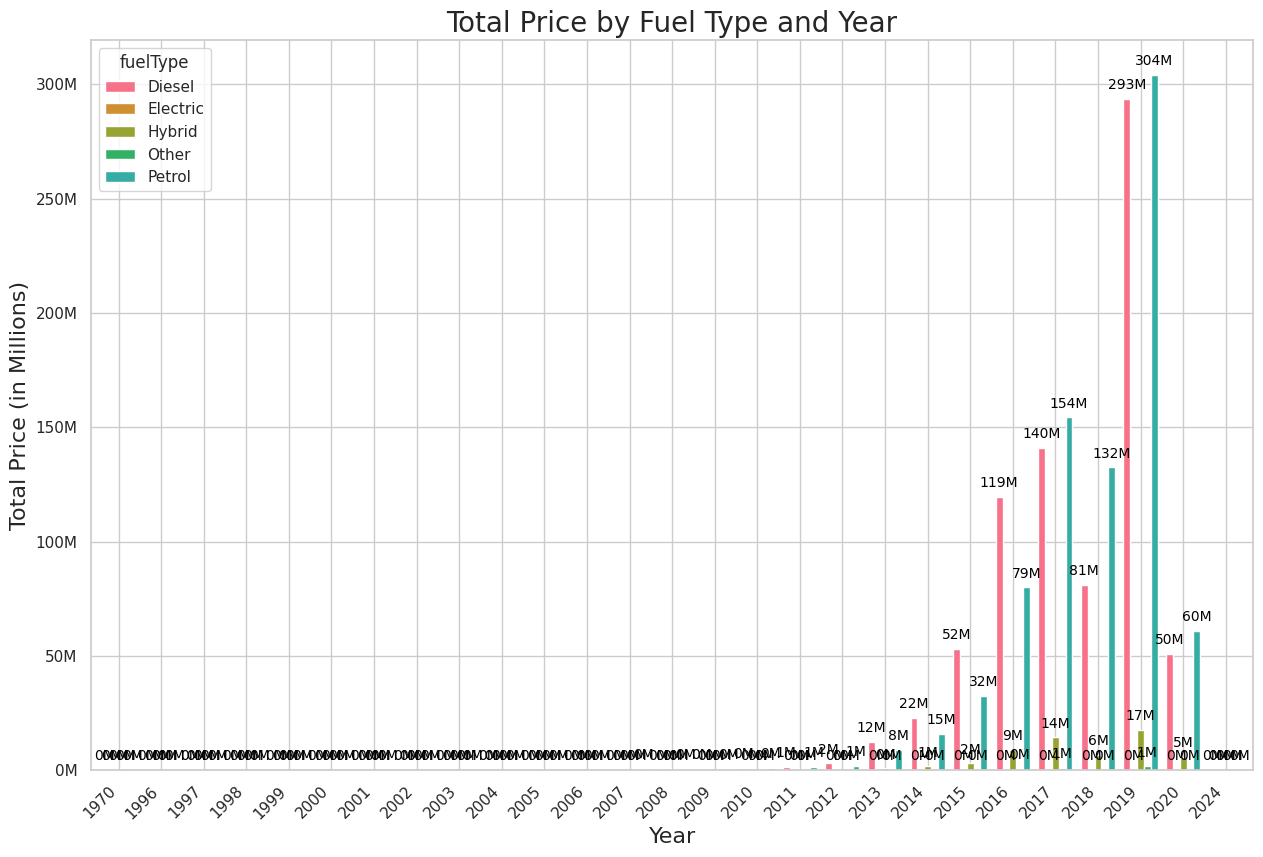

In [13]:
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import matplotlib.pyplot as plt

# Define a function to format y-axis labels in millions
def millions(x, pos):
    return f'{int(x / 1e6)}M'

# Create the bar plot
plt.figure(figsize=(15, 10))
ax = car.groupby(['year', 'fuelType'])['price'].sum().unstack().plot(
    kind='bar',
    figsize=(15,10),
    color=sns.color_palette("husl", 8),
    width=0.8,  # Adjust width of bars
)

# Set title and labels
ax.set_title('Total Price by Fuel Type and Year', fontsize=20)
ax.set_xlabel('Year', fontsize=16)
ax.set_ylabel('Total Price (in Millions)', fontsize=16)

# Format y-axis labels using millions formatter
formatter = FuncFormatter(millions)
ax.yaxis.set_major_formatter(formatter)

# Annotate each bar with the corresponding value
for p in ax.patches:
    ax.annotate(f'{int(p.get_height() / 1e6)}M',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# Rotate x-axis labels to horizontal
plt.xticks(rotation=45, ha='right')

# Adjust layout to provide more space at the bottom
plt.subplots_adjust(bottom=0.15)

# Show plot
plt.show()


**TOTAL PRICE BY VECHILE MODEL**

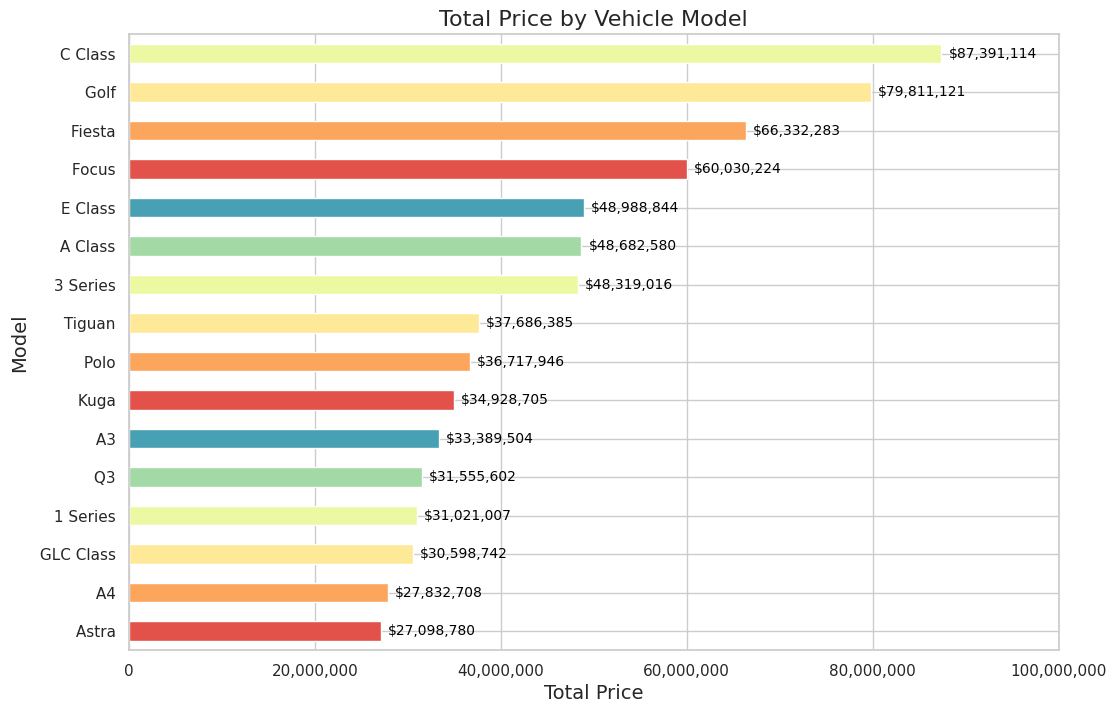

In [30]:
plt.figure(figsize=(12, 8))
ax = car.groupby("model")['price'].sum().sort_values(ascending=False)[15::-1].plot(
    kind='barh',
    color=sns.color_palette("Spectral")
)

ax.set_title('Total Price by Vehicle Model', fontsize=16)
ax.set_xlabel('Total Price', fontsize=14)
ax.set_ylabel('Model', fontsize=14)

ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
for p in ax.patches:
    ax.annotate(f'${p.get_width():,.0f}', (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='left', va='center', fontsize=10, color='black', xytext=(5, 0),textcoords='offset points')
ax.set_xlim(0, 100_000_000)
plt.show()